In [10]:
import numpy as np
import torch.nn as nn
import torch

In [11]:
rng = np.random.RandomState(42)
x = np.linspace(start=0, stop=10, num=100)
X = x[:, np.newaxis]
y_true_mean = 10 + 0.5 * x

In [12]:
y_normal = y_true_mean + rng.normal(loc=0, scale=0.5 + 0.5 * x, size=x.shape[0])
a = 5
y_pareto = y_true_mean + 10 * (rng.pareto(a, size=x.shape[0]) - 1 / (a - 1))

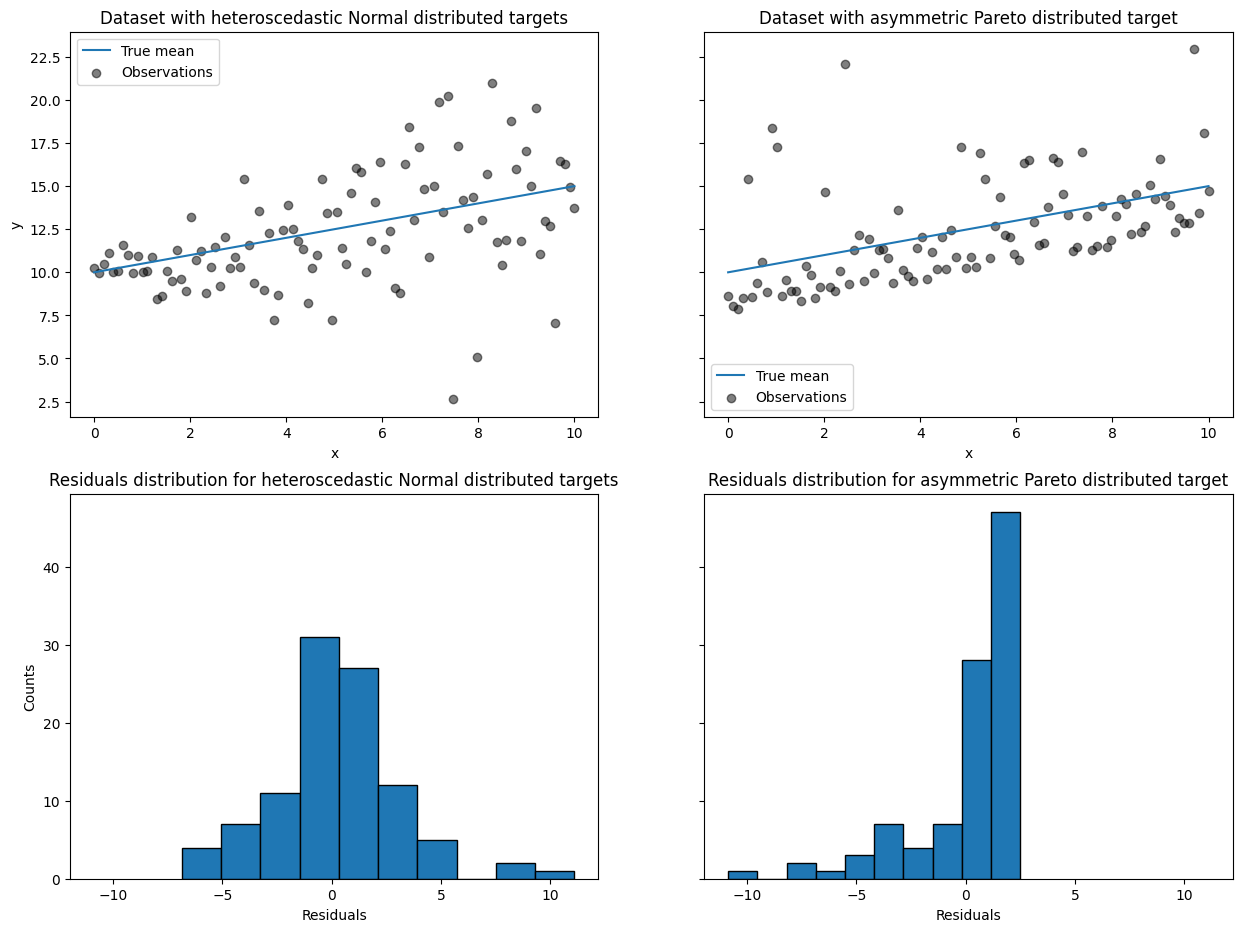

In [13]:
import matplotlib.pyplot as plt

_, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11), sharex="row", sharey="row")

axs[0, 0].plot(x, y_true_mean, label="True mean")
axs[0, 0].scatter(x, y_normal, color="black", alpha=0.5, label="Observations")
axs[1, 0].hist(y_true_mean - y_normal, edgecolor="black")


axs[0, 1].plot(x, y_true_mean, label="True mean")
axs[0, 1].scatter(x, y_pareto, color="black", alpha=0.5, label="Observations")
axs[1, 1].hist(y_true_mean - y_pareto, edgecolor="black")

axs[0, 0].set_title("Dataset with heteroscedastic Normal distributed targets")
axs[0, 1].set_title("Dataset with asymmetric Pareto distributed target")
axs[1, 0].set_title(
    "Residuals distribution for heteroscedastic Normal distributed targets"
)
axs[1, 1].set_title("Residuals distribution for asymmetric Pareto distributed target")
axs[0, 0].legend()
axs[0, 1].legend()
axs[0, 0].set_ylabel("y")
axs[1, 0].set_ylabel("Counts")
axs[0, 1].set_xlabel("x")
axs[0, 0].set_xlabel("x")
axs[1, 0].set_xlabel("Residuals")
_ = axs[1, 1].set_xlabel("Residuals")

In [14]:
def tilted_loss(q, y, f):
    e = (y-f)
    return torch.mean(torch.max(q*e, (q-1)*e), dim=-1)

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [34]:
X_train = torch.from_numpy(X)
y_train = torch.from_numpy(y_normal)

quantiles = [0.05, 0.25, 0.50, 0.75, 0.95]
quantile_loss = np.zeros(len(quantiles))

input_size = 1
hidden_size = 64
output_size = 5

lr = 1e-2
num_epochs = 5000

model = nn.Sequential(
            nn.Linear(input_size, output_size)
        ).double()

opt = torch.optim.Adam(model.parameters(), lr=lr)

In [35]:
# Training loop
for epoch in range(num_epochs):

    # Zero the parameter gradients
    opt.zero_grad()

    # Forward pass
    y_pred = model(X_train)

    # Calculate loss
    loss = 0.0
    for j, q in enumerate(quantiles):
        loss_j = tilted_loss(q, y_train, y_pred[:, j])
        loss += loss_j
        quantile_loss[j] = loss_j
        

    # Backward pass and optimization
    loss.backward()
    opt.step()

    # Print statistics
    running_loss = loss.item()
    print('[%d] loss: %.3f' %
            (epoch + 1, running_loss))

print('Finished Training')

[1] loss: 30.067
[2] loss: 29.921
[3] loss: 29.775
[4] loss: 29.628
[5] loss: 29.483
[6] loss: 29.338
[7] loss: 29.194
[8] loss: 29.049
[9] loss: 28.905
[10] loss: 28.760
[11] loss: 28.616
[12] loss: 28.472
[13] loss: 28.327
[14] loss: 28.183
[15] loss: 28.039
[16] loss: 27.895
[17] loss: 27.752
[18] loss: 27.609
[19] loss: 27.466
[20] loss: 27.323
[21] loss: 27.180
[22] loss: 27.037
[23] loss: 26.894
[24] loss: 26.751
[25] loss: 26.608
[26] loss: 26.465
[27] loss: 26.323
[28] loss: 26.181
[29] loss: 26.039
[30] loss: 25.897
[31] loss: 25.755
[32] loss: 25.613
[33] loss: 25.472
[34] loss: 25.331
[35] loss: 25.190
[36] loss: 25.049
[37] loss: 24.908
[38] loss: 24.767
[39] loss: 24.628
[40] loss: 24.488
[41] loss: 24.349
[42] loss: 24.210
[43] loss: 24.071
[44] loss: 23.933
[45] loss: 23.795
[46] loss: 23.657
[47] loss: 23.519
[48] loss: 23.382
[49] loss: 23.244
[50] loss: 23.107
[51] loss: 22.970
[52] loss: 22.834
[53] loss: 22.700
[54] loss: 22.566
[55] loss: 22.432
[56] loss: 22.299
[

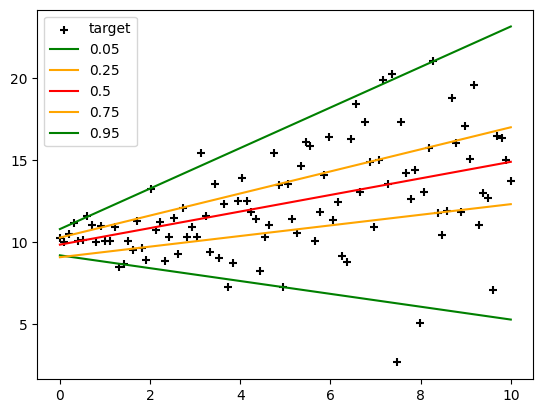

In [36]:
colors = ['green', 'orange', 'red', 'orange', 'green']
plt.scatter(X, y_normal, color='black', marker='+', label='target')

for i, q in enumerate(quantiles):
    plt.plot(X, y_pred.detach().numpy()[:, i], color=colors[i], label=q)

plt.legend()

In [37]:
quantile_loss

array([0.3045426 , 0.85266386, 1.04637749, 0.83038643, 0.24902679])